In [6]:
import pyfredapi as pf
from dotenv import load_dotenv
load_dotenv()
import os
import matplotlib.pyplot as plt
import pandas as pd
import json

api_key = os.environ.get("api_key")

cpi_data = pf.get_series(series_id="CPIAUCSL", api_key=api_key)
cpi_data_not_adj = pf.get_series(series_id="CPIAUCNS", api_key=api_key)

# Convert 'Date' column to datetime format
cpi_data['date'] = pd.to_datetime(cpi_data['date'])
# Sort DataFrame by 'Date' in ascending order
cpi_data.sort_values('date', inplace=True)
# Calculate month-over-month percentage change
cpi_data['MoM_Percentage_Change'] = cpi_data['value'].pct_change() * 100
# Calculate year-over-year percentage change
cpi_data_not_adj['YoY_Percentage_Change'] = cpi_data_not_adj['value'].pct_change(12) * 100

# Merge YoY_Percentage_Change column from df2 to df1 based on 'Date'
cpi_data = pd.merge(cpi_data, cpi_data_not_adj[['date', 'YoY_Percentage_Change']], on='date', how='left')

print(cpi_data)

cpi_info = pf.get_series_info(series_id="CPIAUCSL", api_key=api_key)

    realtime_start realtime_end       date    value  MoM_Percentage_Change  \
0       2023-05-13   2023-05-13 1947-01-01   21.480                    NaN   
1       2023-05-13   2023-05-13 1947-02-01   21.620               0.651769   
2       2023-05-13   2023-05-13 1947-03-01   22.000               1.757632   
3       2023-05-13   2023-05-13 1947-04-01   22.000               0.000000   
4       2023-05-13   2023-05-13 1947-05-01   21.950              -0.227273   
..             ...          ...        ...      ...                    ...   
911     2023-05-13   2023-05-13 2022-12-01  298.990               0.131280   
912     2023-05-13   2023-05-13 2023-01-01  300.536               0.517074   
913     2023-05-13   2023-05-13 2023-02-01  301.648               0.370006   
914     2023-05-13   2023-05-13 2023-03-01  301.808               0.053042   
915     2023-05-13   2023-05-13 2023-04-01  302.918               0.367783   

     YoY_Percentage_Change  
0                18.131868  
1    

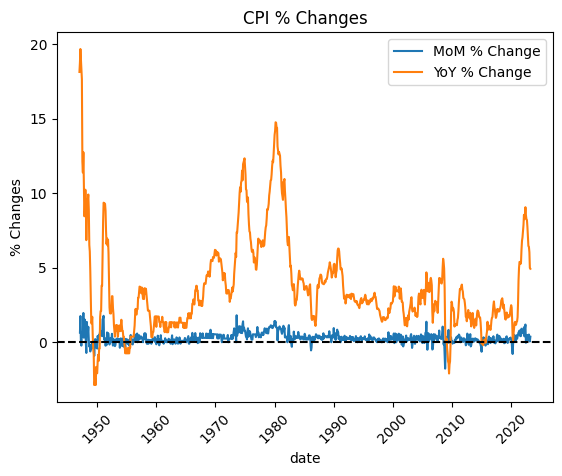

In [7]:
# Plot MoM_Percentage_Change and YoY_Percentage_Change
plt.plot(cpi_data['date'], cpi_data['MoM_Percentage_Change'], label='MoM % Change')
plt.plot(cpi_data['date'], cpi_data['YoY_Percentage_Change'], label='YoY % Change')

plt.xlabel('date')
plt.ylabel('% Changes')
plt.title('CPI % Changes')
plt.legend()
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

plt.show()

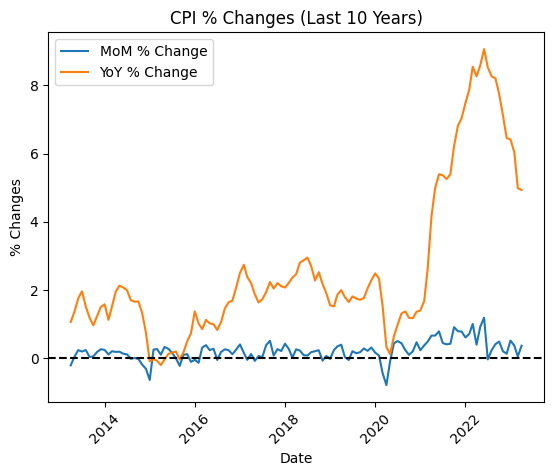

In [11]:
# Filter the DataFrame for the last 10 years
last_10_years_data = cpi_data[cpi_data['date'] >= cpi_data['date'].max() - pd.DateOffset(years=10)]

# Plot MoM_Percentage_Change and YoY_Percentage_Change for the last 10 years
plt.plot(last_10_years_data['date'], last_10_years_data['MoM_Percentage_Change'], label='MoM % Change')
plt.plot(last_10_years_data['date'], last_10_years_data['YoY_Percentage_Change'], label='YoY % Change')

plt.xlabel('Date')
plt.ylabel('% Changes')
plt.title('CPI % Changes (Last 10 Years)')
plt.legend()
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

plt.show()

In [9]:
# Convert DataFrame to JSON
cpi_json = cpi_data.to_json(orient='records')

# Parse the JSON
data = json.loads(cpi_json)

# Get the last item
last_item = data[-1]

print("MoM % Change: " + str(last_item['MoM_Percentage_Change']) + "% | Last Updated: " + str(cpi_info.last_updated))
print("YoY % Change: " + str(last_item['YoY_Percentage_Change']) + "% | Last Updated: " + str(cpi_info.last_updated))

MoM % Change: 0.3677834915% | Last Updated: 2023-05-10 07:40:02-05
YoY % Change: 4.9303203982% | Last Updated: 2023-05-10 07:40:02-05


In [10]:
print("Info: " + str(cpi_info.id))
print("Title: " + str(cpi_info.title))
print("Frequency: " + str(cpi_info.frequency))
print("Units: " + str(cpi_info.units))
print("Last Updated: " + str(cpi_info.last_updated))
print("Popularity: " + str(cpi_info.popularity))
print("Notes: " + str(cpi_info.notes))

Info: CPIAUCSL
Title: Consumer Price Index for All Urban Consumers: All Items in U.S. City Average
Frequency: Monthly
Units: Index 1982-1984=100
Last Updated: 2023-05-10 07:40:02-05
Popularity: 96
Notes: The Consumer Price Index for All Urban Consumers: All Items (CPIAUCSL) is a price index of a basket of goods and services paid by urban consumers. Percent changes in the price index measure the inflation rate between any two time periods. The most common inflation metric is the percent change from one year ago. It can also represent the buying habits of urban consumers. This particular index includes roughly 88 percent of the total population, accounting for wage earners, clerical workers, technical workers, self-employed, short-term workers, unemployed, retirees, and those not in the labor force.

The CPIs are based on prices for food, clothing, shelter, and fuels; transportation fares; service fees (e.g., water and sewer service); and sales taxes. Prices are collected monthly from ab